## Esercizio Classificazione 1

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/NLPes1.csv'
df = pd.read_csv(path)
df

,text,class
0,b'insane ( but inspired ) musical about alferd...,1
1,b'written by david j . schow and john shirley ...,0
2,"b'miramax "" disinvited "" on-line media from pr...",0
3,"b'in "" the astronaut\'s wife , "" charlize ther...",0
4,b'one of the 90s\' most unwelcome thriller tre...,0
...,...,...
408,"b'hav plenty , as we are told in the beginning...",0
409,b'brian de palma\'s snake eyes stars nicolas c...,0
410,b'contact ( pg ) there\'s a moment late in rob...,1
411,"b""this is a film that i was inclined to like a...",0


In [2]:
# STEP1 DEFINIRE ED APPLICARE LA REGEX

patterns = {
            r'\d+': '',      # rimuove digits (numeri)
            r'[^\w\s]': '',  # Remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',#remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '      # rimuove tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

In [3]:
df = clean_column(df, 'text', patterns)
df

,text,class
0,binsane but inspired musical about alferd pack...,1
1,bwritten david schow and john shirley based th...,0
2,bmiramax disinvited online media from press sc...,0
3,bin the astronauts wife charlize theron plays ...,0
4,bone the most unwelcome thriller trends return...,0
...,...,...
408,bhav plenty are told the beginning and reminde...,0
409,bbrian palmas snake eyes stars nicolas cages e...,0
410,bcontact theres moment late robert zemeckiss c...,1
411,bthis film that was inclined like the outset t...,0


In [4]:
df['text'][0]

'binsane but inspired musical about alferd packer the first man ever tried for cannibalism america nas the story unfolds learn what events led packer trey parker supposedly killing and eating the five men who got lost while accompanying him through the mountains colorado search gold nthroughout packer must contend with evil trappers bent stealing his prized horse tribe ute indians that doesnt seem quite the mark and terrible winter storm that leads the eventual cannibalism nparker obviously knows his musicals very well because the viewer also treated some the most maddeningly catchy songs appear film would accomplish this again his postcannibal nmusical motion picture south park bigger longer and uncut napart from the inherent interest seeing pre south park parker and stone their first effort cannibal nalso offers some pretty decent laughs nthe aforementioned ute indian tribe that packers group encounters definite highlight are two rousing musical numbers about snowmen one which ends c

In [5]:
text = list(map(str, df['text']))
text = ''.join(text)

(-0.5, 799.5, 399.5, -0.5)

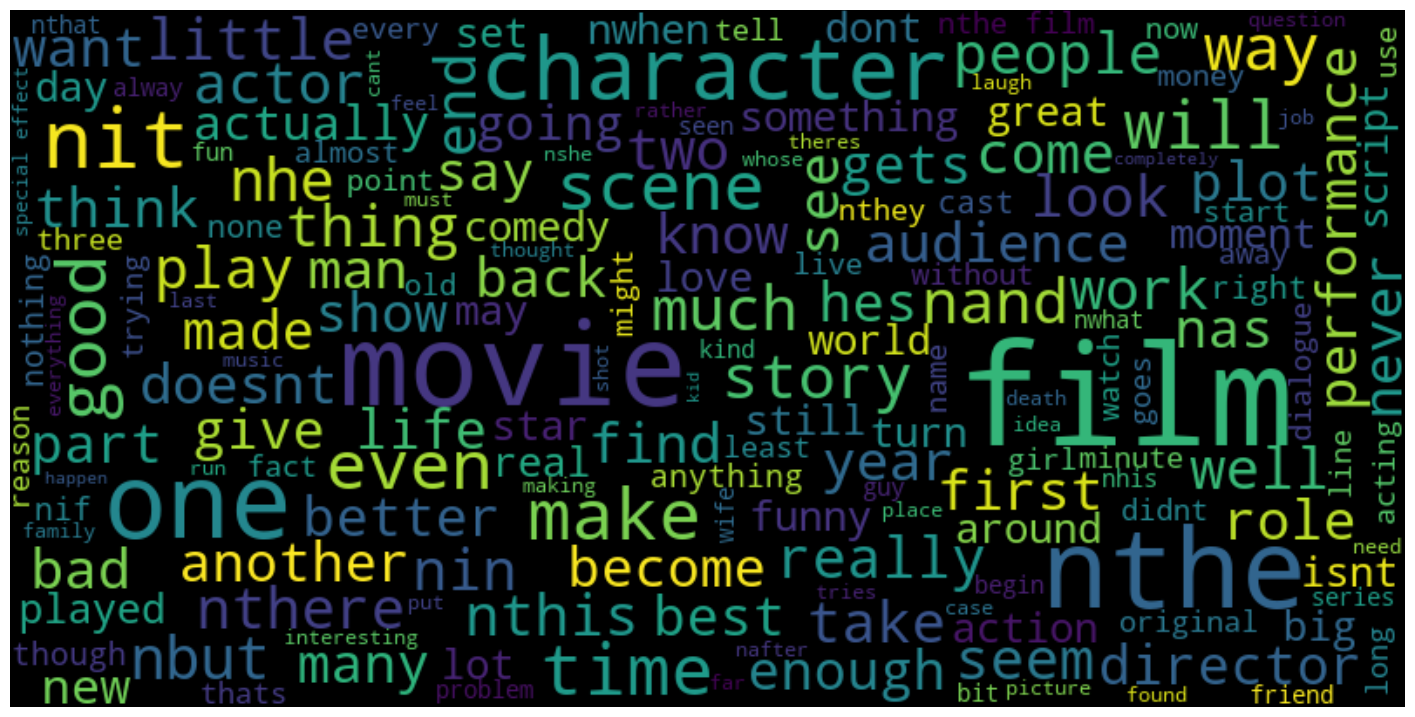

In [6]:
## STEP 2 : EDA con WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [12]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [13]:
#df = df.dropna()

In [7]:
##STEP 3: Definizre X e y (features testuali e Target)

X = df['text']
y = df['class']

In [8]:
##STEP 4: Vettorizzazione
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [11]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.7096774193548387

In [14]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.6854838709677419

In [20]:
labels = ['Class0', 'Class1']

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      Class0       0.70      0.97      0.81        88
      Class1       0.00      0.00      0.00        36

    accuracy                           0.69       124
   macro avg       0.35      0.48      0.41       124
weighted avg       0.50      0.69      0.58       124



Text(95.72222222222221, 0.5, 'Actual')

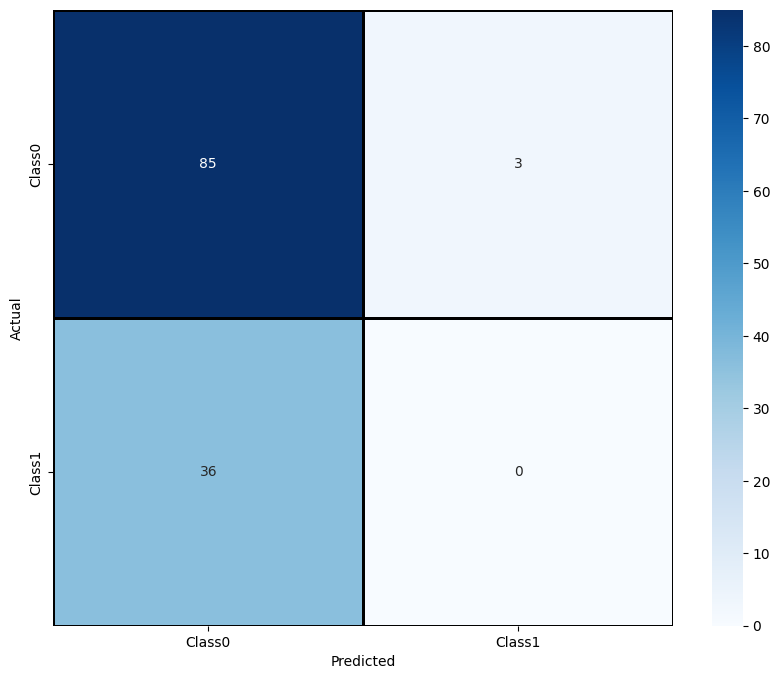

In [21]:
labels = ['Class0', 'Class1']

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [22]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.7096774193548387

In [23]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
#clf = classifier = MultinomialNB()

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7419354838709677


In [24]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      Class0       0.80      0.85      0.82        88
      Class1       0.57      0.47      0.52        36

    accuracy                           0.74       124
   macro avg       0.68      0.66      0.67       124
weighted avg       0.73      0.74      0.73       124



Text(95.72222222222221, 0.5, 'Actual')

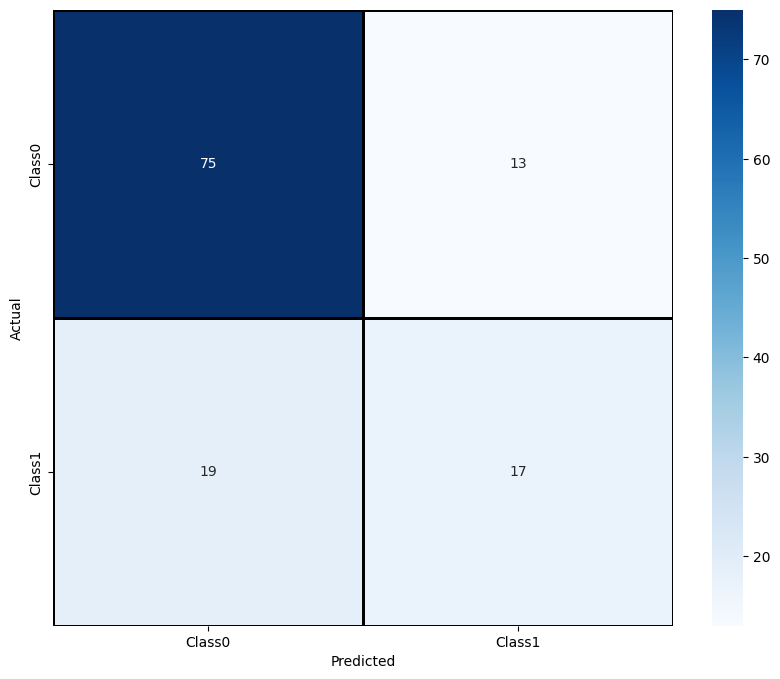

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [27]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.78846154 0.75       0.76923077 0.82692308 0.82692308 0.74509804
 0.84313725 0.74509804]
mean=0.7868589743589743
std=0.03797592447201447


In [29]:
import joblib
joblib.dump(pipe,'NLPEs1.pkl')

['NLPEs1.pkl']

In [32]:
import joblib

uploaded_model = joblib.load('NLPEs1.pkl')
pred = uploaded_model.predict(['very beautiful']) # 1 --> Diabetic
pred[0]

1